###### Baseball Case Study

###### import Libraries

In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler,power_transform
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn import metrics
from scipy.stats import randint


%matplotlib inline
from sklearn import metrics
from sklearn.metrics import make_scorer


import warnings
warnings.filterwarnings('ignore')

###### Load Dataset

In [370]:
pd.pandas.set_option('display.max_columns',None)
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')


###### check the dimension of dataset

In [371]:
df.shape

(30, 17)

*Observation:*<br>
*There are 30 Rows and 17 Columns in the Dataset.*

###### sample of data

In [372]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


###### Check Information About Dataset

In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


*Observation:*<br>
*There are 16 int Type and 1 float Type Columns.<br>
All columns Non-null count is 30, which is equall to total rows in Dataset. So there is no null value.*

###### Check for Unique Value in Each Column

In [374]:
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

*Observation:<br>
Column CG and SHO < 20 unique values they have categorical data.*

###### Check for Missing Values

In [375]:
df.isnull().sum().sum()

0

*Observation:<br>
There is no null value in the Dataset.*

###### Check for Duplicate Rows

In [376]:
sum(df.duplicated())

0

*Observation:<br>
There are no Duplicate Rows in the Dataset.*

###### Check for Zero value in Dataset

In [377]:
print((df==0).sum())
#print(df[df==0].count())
print('Total zeros in Dataset:', df[df==0].count().sum())

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     3
SHO    0
SV     0
E      0
dtype: int64
Total zeros in Dataset: 3


*Observation:<br>
All Column have no Zero value. Except Column CG have 3 Zero values in rows.*

###### Percentage(%) of Date have Zero value

In [378]:
df[df==0].count()/df.shape[0]*100   

W       0.0
R       0.0
AB      0.0
H       0.0
2B      0.0
3B      0.0
HR      0.0
BB      0.0
SO      0.0
SB      0.0
RA      0.0
ER      0.0
ERA     0.0
CG     10.0
SHO     0.0
SV      0.0
E       0.0
dtype: float64

*Observation:<br>
Column CG have 10% of zero value data.*

###### Target and Feature Variables

*Observation :* <br> *Target Variable(Dependent)-W (Number of predicted wins) <br> Feature Variable(Independent)-All Variables*

###### Check for Type of Variable

###### Check for Numerical Variables

In [379]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
df[numerical_features].head()

Number of numerical variables:  17


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


###### check for Numeric feature unique value count

In [380]:
for feature in numerical_features:
    print('The feature is {} and number of numerical are {}'.format(feature,len(df[feature].unique())))

The feature is W and number of numerical are 24
The feature is R and number of numerical are 28
The feature is AB and number of numerical are 29
The feature is H and number of numerical are 29
The feature is 2B and number of numerical are 22
The feature is 3B and number of numerical are 23
The feature is HR and number of numerical are 27
The feature is BB and number of numerical are 29
The feature is SO and number of numerical are 29
The feature is SB and number of numerical are 27
The feature is RA and number of numerical are 30
The feature is ER and number of numerical are 30
The feature is ERA and number of numerical are 30
The feature is CG and number of numerical are 9
The feature is SHO and number of numerical are 12
The feature is SV and number of numerical are 20
The feature is E and number of numerical are 21


*Observation:*<br> *All 17 features have numeric values*

###### Check for Continuous variable and Discrete variable

In [381]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

#Discrete Variables
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

# discrete feature
df[discrete_feature].head()

Discrete Variables Count: 7


,W,2B,3B,CG,SHO,SV,E
0,95,300,42,2,8,56,88
1,83,277,44,2,12,45,86
2,81,303,29,11,10,38,79
3,76,260,27,7,9,37,101
4,74,289,49,7,12,35,86


In [382]:
# # list of continuous variables
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature ]
print("Continuous Variables Count {}".format(len(continuous_feature)))

# continuous feature
df[continuous_feature].head()

Continuous Variables Count 10


,R,AB,H,HR,BB,SO,SB,RA,ER,ERA
0,724,5575,1497,139,383,973,104,641,601,3.73
1,696,5467,1349,156,439,1264,70,700,653,4.07
2,669,5439,1395,141,533,1157,86,640,584,3.67
3,622,5533,1381,136,404,1231,68,701,643,3.98
4,689,5605,1515,151,455,1259,83,803,746,4.64


*Observation:*<br> *There are 7 Discrete Variables and 10 Continuous Variables. <br> There is no Categorical Variable*

###### Check Cardinality of All Varaibles

Text(0.5, 1.0, 'Cardinality')

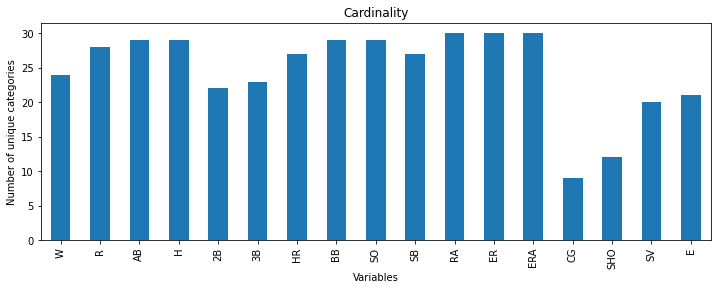

In [383]:
df[numerical_features].nunique().plot.bar(figsize=(12,4))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

*Observation:*<br> *All Countinues variable have high cardinality Except CG and SHO*

###### Univariate Analysis

###### for Discrete Variable

###### 1.W Variable   (Number of predicted wins)

<AxesSubplot:>

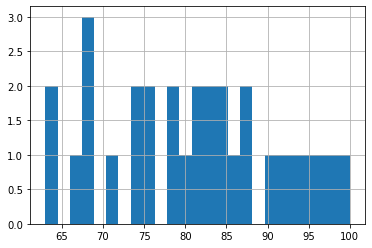

In [384]:
#df['W'].value_counts().head(100).plot(kind = "bar",fontsize=15,figsize=(29,8))
#df.groupby(['W']).size().plot(kind = "bar",fontsize=15,figsize=(29,8))
df['W'].hist(bins=25)

*Observation:*<br> *63to 67, 71, 78 to 80, 84 to 100 win are the frequently coming wins* <br>
*68 win occured only 3 times.* <br> 
*74,76,81,84 win occured only 2 times.*

###### 2. 2B Variable (Doubles)

<AxesSubplot:xlabel='2B'>

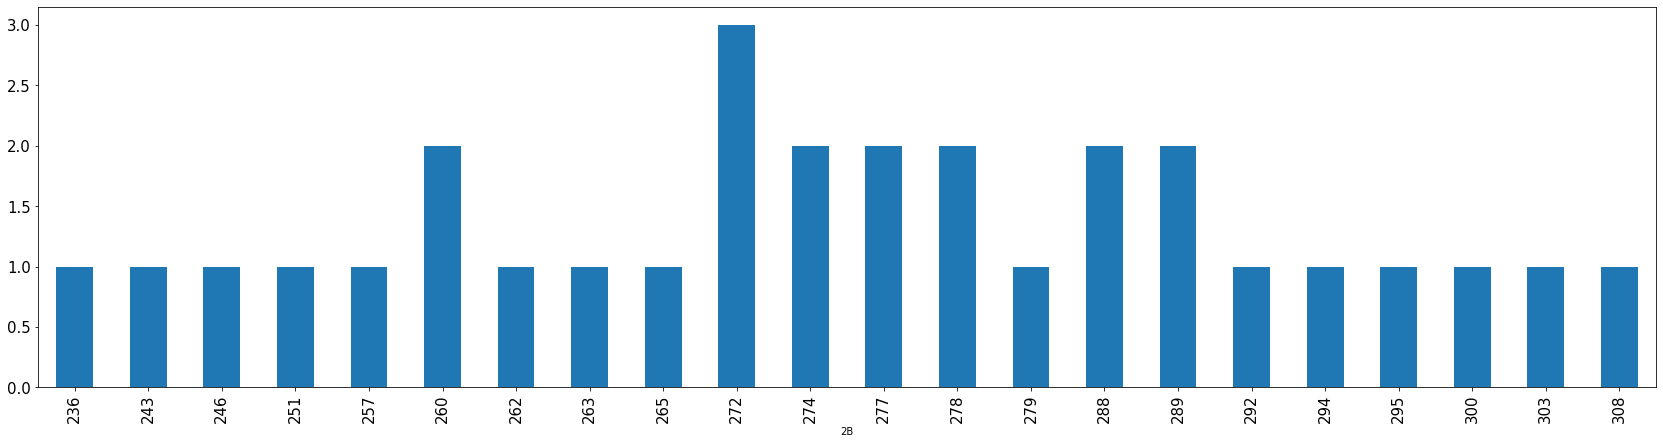

In [385]:
#df['2B'].value_counts().head(54).plot(kind = "bar",fontsize=15,figsize=(29,6))
df.groupby(['2B']).size().plot(kind = "bar",fontsize=15,figsize=(29,7))

*Observation:*<br>*Doubles happend more than onces is in the range 272 to 289* <br>
*mostly Dobles happend is in the range between 236 to 265 and 292 to 308*

###### 3. 3B Variable  (Triples)

<AxesSubplot:xlabel='3B'>

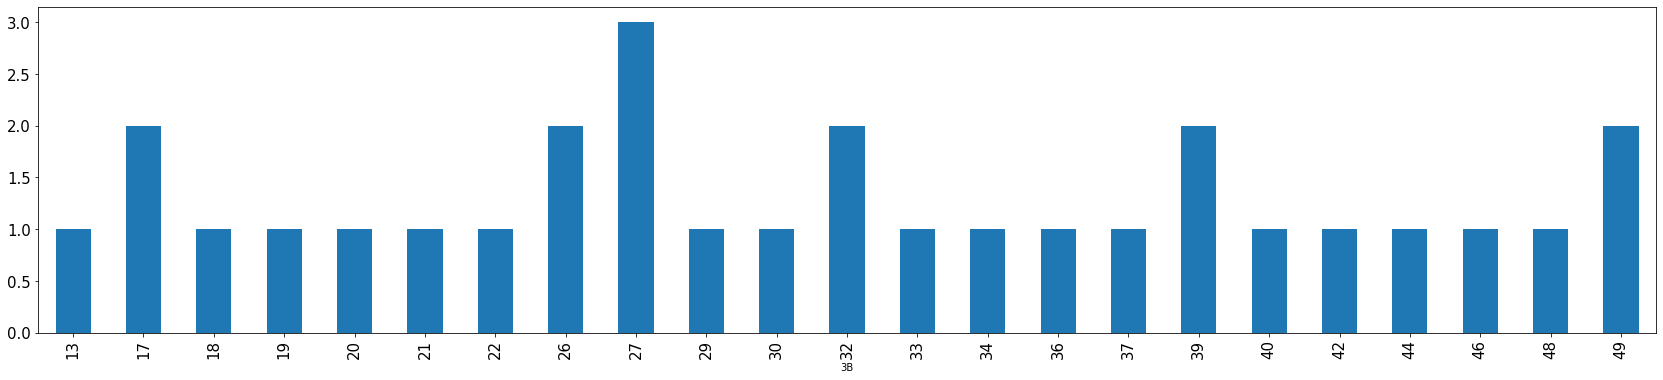

In [386]:
#df['3B'].value_counts().head(54).plot(kind = "bar",fontsize=15,figsize=(29,6))
df.groupby(['3B']).size().plot(kind = "bar",fontsize=15,figsize=(29,6))

*Observation:<br>
27 is value Triples happened thrice.<br>
17,26,32,39,49 is Triples happend twice. <br>
from range 13 to 49 mostly occured*

###### 4. CG Variable  (Complete Games)

<AxesSubplot:ylabel='CG'>

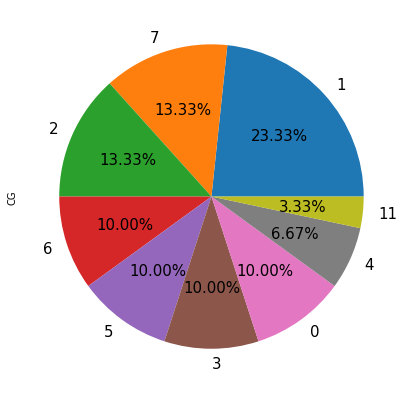

In [387]:
df['CG'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(7,7))
#df['CG'].value_counts().plot(kind = "hist",fontsize=15,figsize=(7,7))


*Observation :* <br> 
*23% pichers have 1 Complete Games.* <br>
*13% pichers have 2 Complete Games.13% pichers have 7 Complete Games.* <br>
*10% pichers have 0 Complete Games.10% pichers have 3 Complete Games.*<br>
*10% pichers have 5 Complete Games.10% pichers have 6 Complete Games.* <br>
*6% pichers have 4 Complete Games.* <br>
*3% pichers have 11 Complete Games.*

###### 5. SHO Variable (Shutouts)

<AxesSubplot:ylabel='SHO'>

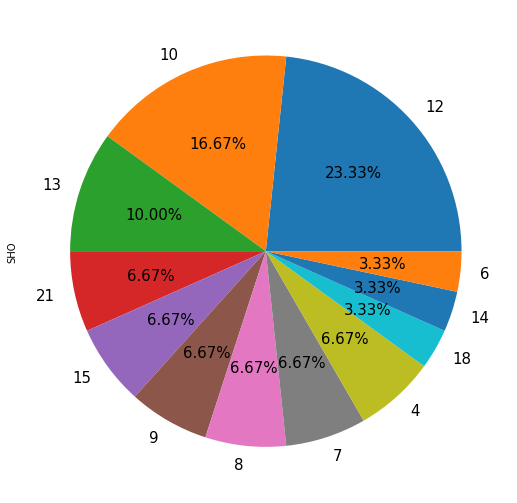

In [388]:
df['SHO'].value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=15,figsize=(9,9))

*Observation :* <br> 
*6% pitchers who get 4 shutout.<br>
3% pitchers who get 6 shutout.<br>
6% pitchers who get 7 shutout.<br>
6% pitchers who get 8 shutout.<br>
6% pitchers who get 9 shutout.<br>
16% pitchers who get 10 shutout.<br>
23% pitchers who get 12 shutout.<br>
10% pitchers who get 13 shutout<br>
3% pitchers who get 14 shutout.<br>
6% pitchers who get 15 shutout.<br>
3% pitchers who get 18 shutout.<br>
6% pitchers who get 21 shutout.*

###### 6. SV(Saves) Variable

<AxesSubplot:xlabel='SV'>

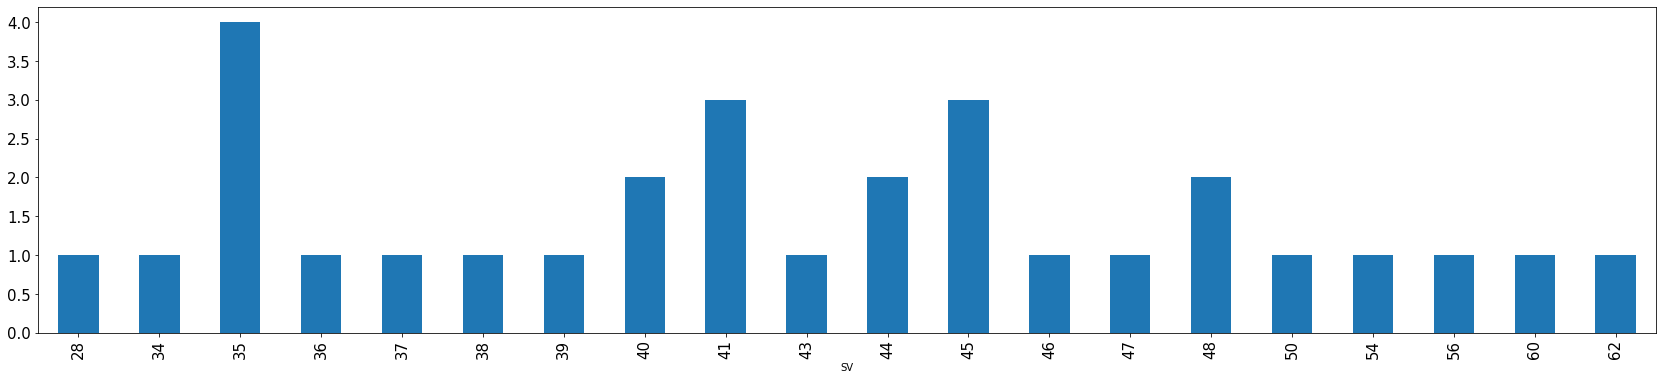

In [389]:
df.groupby(['SV']).size().plot(kind = "bar",fontsize=15,figsize=(29,6))
#df['SV'].hist(bins=25)

*Observation :*<br> *picher who win save is in the range of 35 to 48. <br>
highest is the 35, 40 to 45 and 48*

###### 7. E(Errors ) Variable

<AxesSubplot:xlabel='E'>

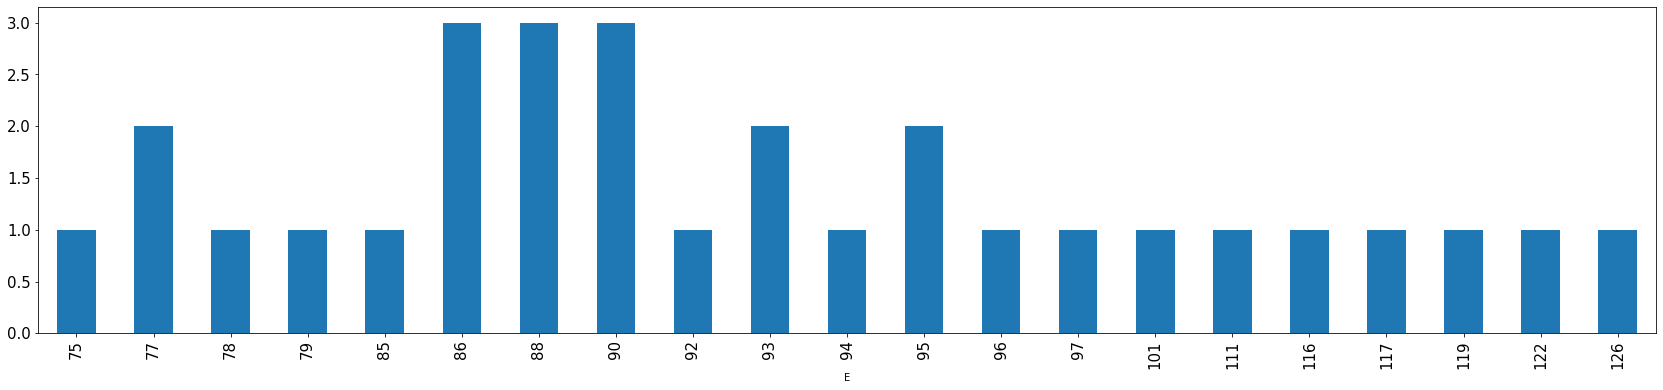

In [390]:
#df['E'].value_counts().head(54).plot(kind = "bar",fontsize=15,figsize=(29,6))
df.groupby(['E']).size().plot(kind = "bar",fontsize=15,figsize=(29,6))


*Observation:<br>
75, 78 to 85, 92,94,96 to 126 is the range fielder made Error once.<br>
77, 86 to90,93, 95 range Error happend twice. <br>
86 to 90 range Error happend thrice*

###### for Continuous Variable

###### 1. R(Runs) Variable

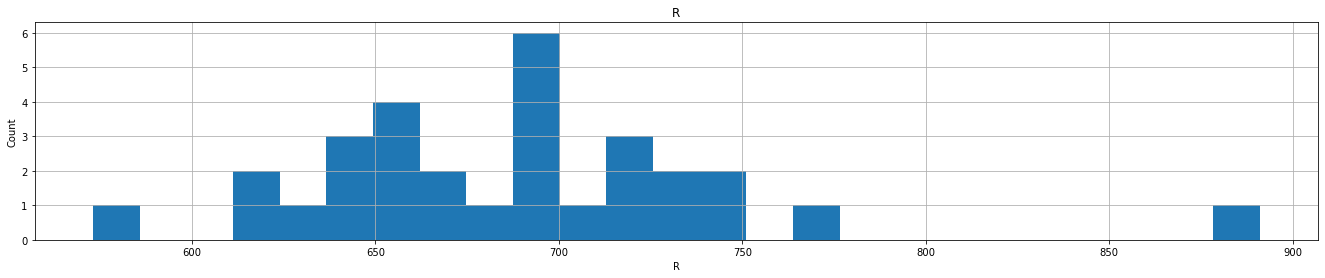

In [391]:
plt.figure(figsize=(23,4))
df['R'].hist(bins=25)
#df.groupby(['E']).size().plot(kind = "bar",fontsize=15,figsize=(29,6))
plt.xlabel('R')
plt.ylabel("Count")
plt.title('R')
plt.show()


*Observation:<br>
612 to 750 range mostly taken runs.*

###### 2. AB(At Bats) Variable

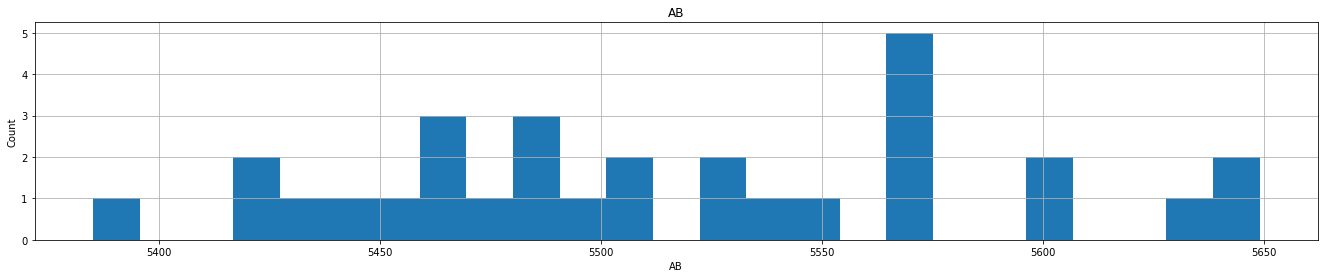

In [392]:
plt.figure(figsize=(23,4))
df['AB'].hist(bins=25)
plt.xlabel('AB')
plt.ylabel("Count")
plt.title('AB')
plt.show()

*Observation :*<br> *batter is credited with the At bat is in the range of 5440 to 5550.*

###### 3. H(Hits) Variable

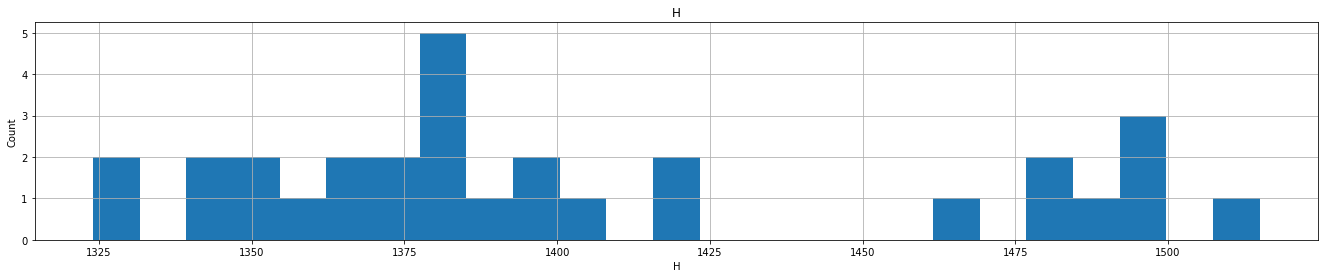

In [393]:
plt.figure(figsize=(23,4))
df['H'].hist(bins=25)
plt.xlabel('H')
plt.ylabel("Count")
plt.title('H')
plt.show()

*Observation :* <br> *Hits are in the range of 1340 to 1410*

###### 4. HR(Homeruns) Variable

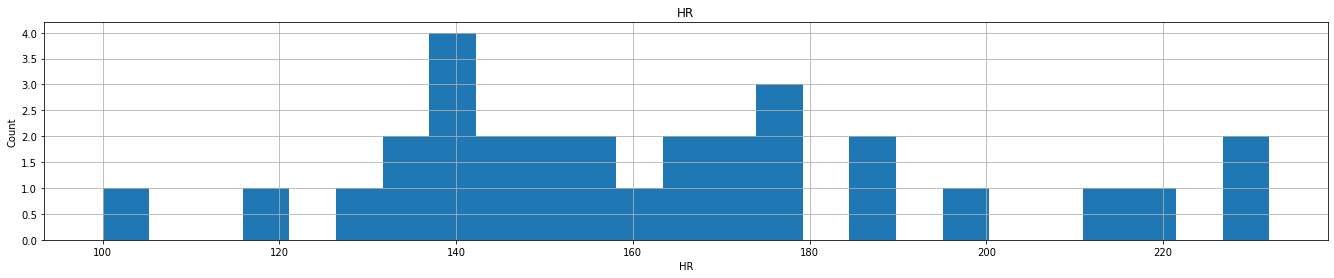

In [394]:
plt.figure(figsize=(23,4))
df['HR'].hist(bins=25)
plt.xlabel('HR')
plt.ylabel("Count")
plt.title('HR')
plt.show()

*Observation :* <br> *mostly taken Homeruns are in the range of 125 to 180.*

###### 5. BB(Walks) Variable

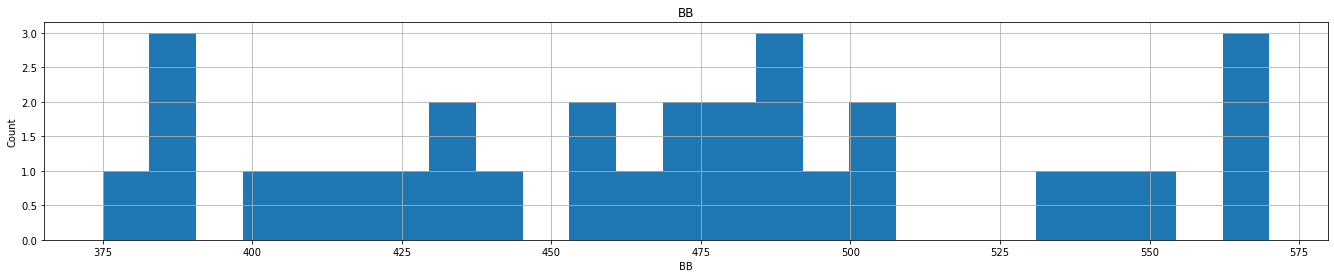

In [395]:
plt.figure(figsize=(23,4))
df['BB'].hist(bins=25)
plt.xlabel('BB')
plt.ylabel("Count")
plt.title('BB')
plt.show()

*Observation :*<br> *Walks are in the range of 400 to 510.*

###### 6. SO(Strikeouts) Variable

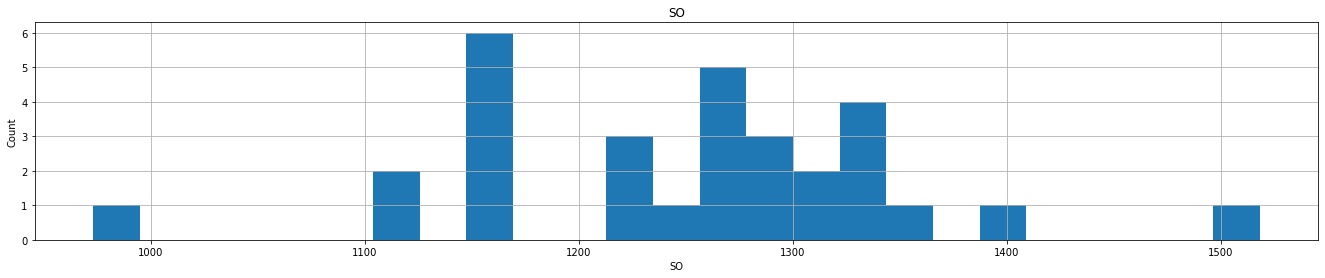

In [396]:
plt.figure(figsize=(23,4))
df['SO'].hist(bins=25)
plt.xlabel('SO')
plt.ylabel("Count")
plt.title('SO')
plt.show()

*Observation :* <br> batter gets Strikout are mostly in the range of 1210 to 1380

###### 7. SB(Stolen Bases) Variable

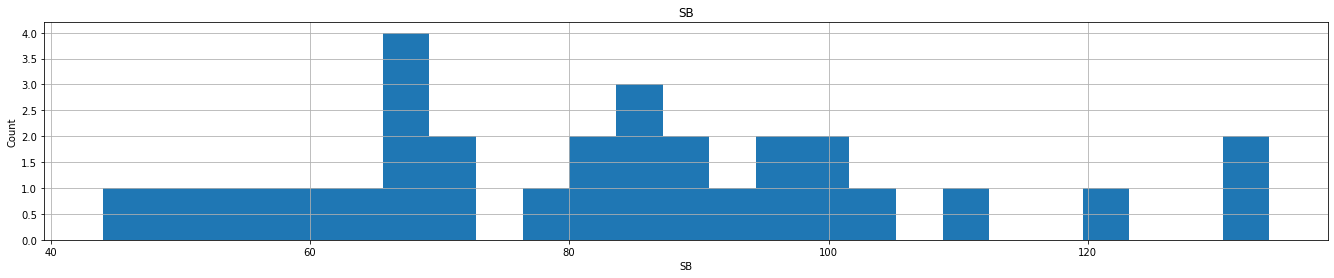

In [397]:
plt.figure(figsize=(23,4))
df['SB'].hist(bins=25)
plt.xlabel('SB')
plt.ylabel("Count")
plt.title('SB')
plt.show()

###### 8. RA(Runs Allowed) Variable

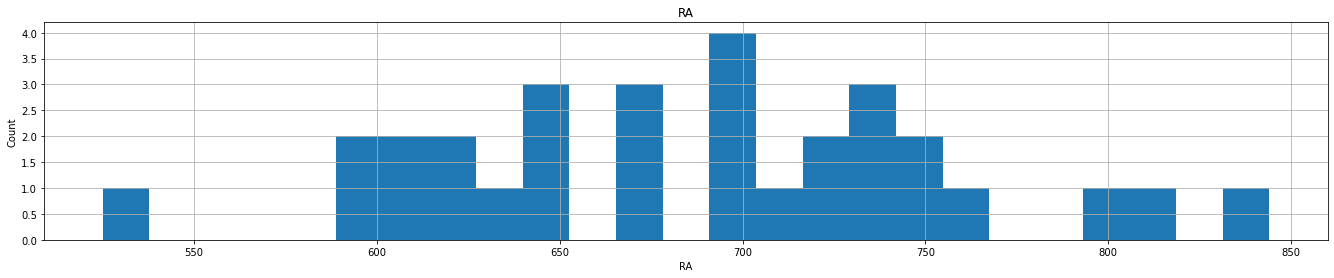

In [398]:
plt.figure(figsize=(23,4))
df['RA'].hist(bins=25)
plt.xlabel('RA')
plt.ylabel("Count")
plt.title('RA')
plt.show()

###### 9. ER(Earned Runs) Variable

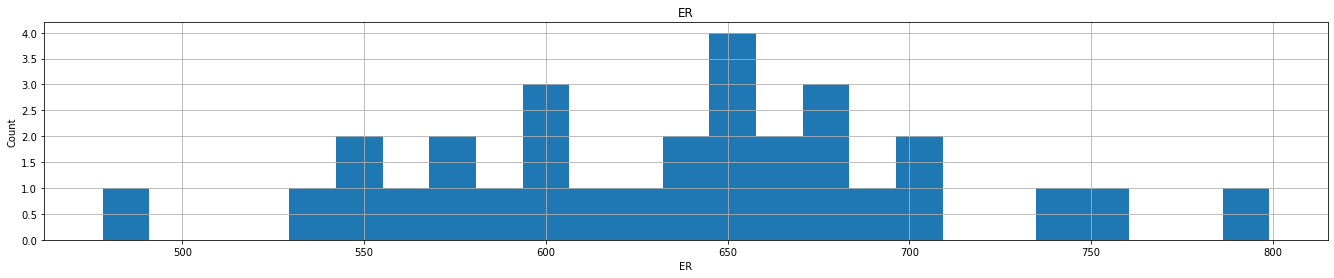

In [399]:
plt.figure(figsize=(23,4))
df['ER'].hist(bins=25)
plt.xlabel('ER')
plt.ylabel("Count")
plt.title('ER')
plt.show()

###### 10. ERA(Earned Run Average) Variable

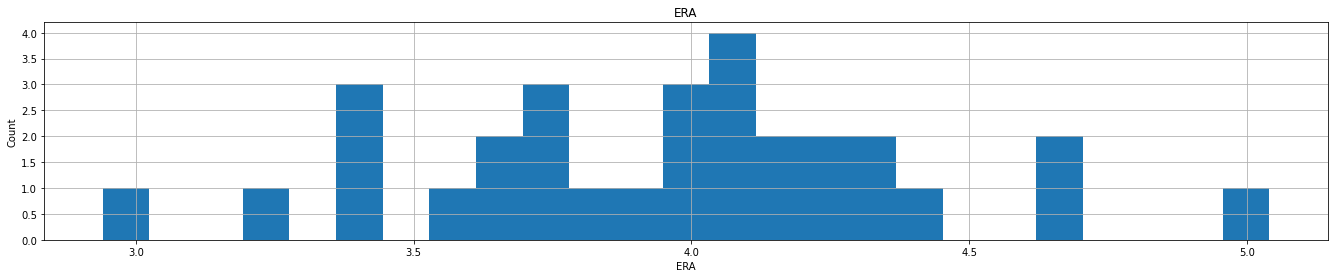

In [400]:
plt.figure(figsize=(23,4))
df['ERA'].hist(bins=25)
plt.xlabel('ERA')
plt.ylabel("Count")
plt.title('ERA')
plt.show()

###### Bivariate Analysis

###### for Discrete Variable

###### 1. 2B and W Variable

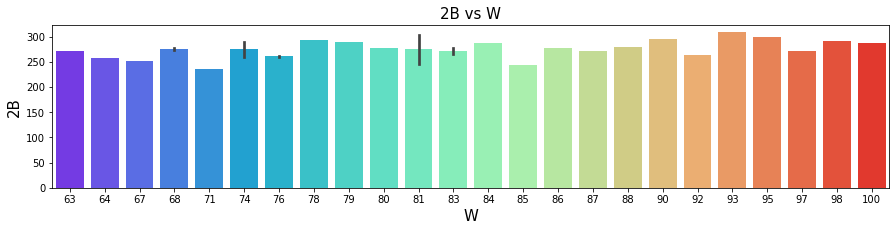

In [401]:
fig, ax = plt.subplots(figsize = (15 ,3))
sns.barplot(data=df,y='2B',x='W',ax = ax ,palette='rainbow')
ax.set_xlabel( "W" , size = 15 )
ax.set_ylabel( '2B' , size = 15 )
ax.set_title( "2B vs W" , size = 15 )
plt.show()


###### 2. 3B and W Variable 

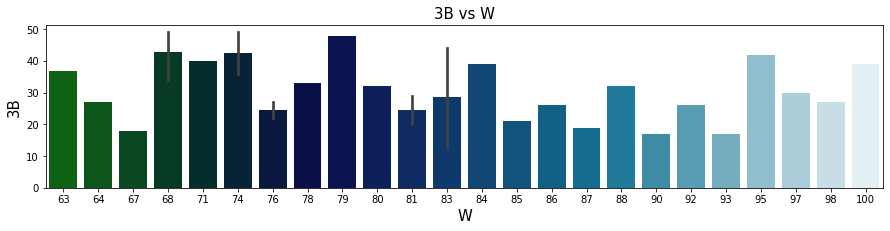

In [402]:
fig, ax = plt.subplots(figsize = (15 ,3))
s=sns.barplot(data=df,y='3B',x='W',color='green',ax = ax ,palette='ocean')
ax.set_xlabel( "W" , size = 15 )
ax.set_ylabel( "3B" , size = 15 )
ax.set_title( "3B vs W" , size = 15 )
plt.show()

###### 3. CG and W Variable

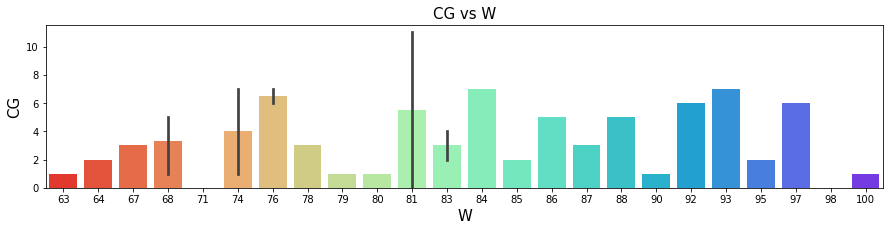

In [403]:
fig, ax = plt.subplots(figsize = (15 ,3))
s=sns.barplot(data=df,y='CG',x='W',color='green',ax = ax ,palette='rainbow_r')
ax.set_xlabel( "W" , size = 15 )
ax.set_ylabel( "CG" , size = 15 )
ax.set_title( "CG vs W" , size = 15 )
plt.show()

###### 4. SHO and W Variable

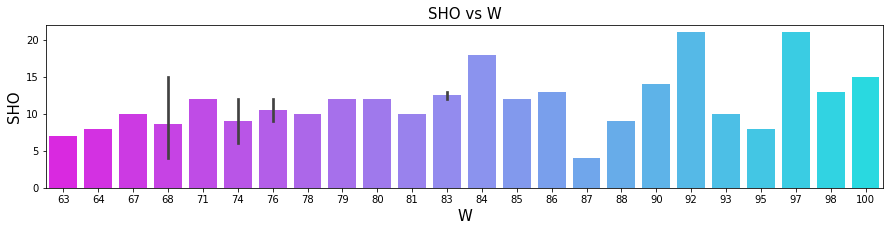

In [404]:
fig, ax = plt.subplots(figsize = (15 ,3))
s=sns.barplot(data=df,y='SHO',x='W',color='green',ax = ax ,palette='cool_r')
ax.set_xlabel( "W" , size = 15 )
ax.set_ylabel( "SHO" , size = 15 )
ax.set_title( "SHO vs W" , size = 15 )
plt.show()

In [405]:
#6. SV and W Variable

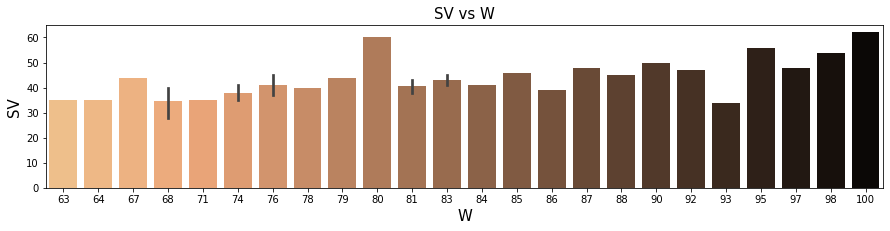

In [406]:
fig, ax = plt.subplots(figsize = (15 ,3))
s=sns.barplot(data=df,y='SV',x='W',color='green',ax = ax ,palette='copper_r')
ax.set_xlabel( "W" , size = 15 )
ax.set_ylabel( "SV" , size = 15 )
ax.set_title( "SV vs W" , size = 15 )
plt.show()

In [407]:
#7. E and W Variable

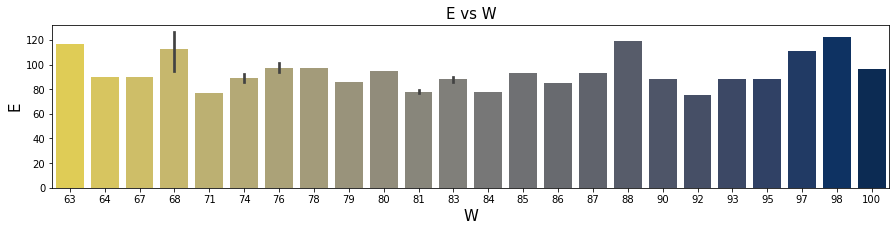

In [408]:
fig, ax = plt.subplots(figsize = (15 ,3))
s=sns.barplot(data=df,y='E',x='W',color='green',ax = ax ,palette='cividis_r')
ax.set_xlabel( "W" , size = 15 )
ax.set_ylabel( "E" , size = 15 )
ax.set_title( "E vs W" , size = 15 )
plt.show()

###### for Continuous Variable

###### 1. R and W Variable

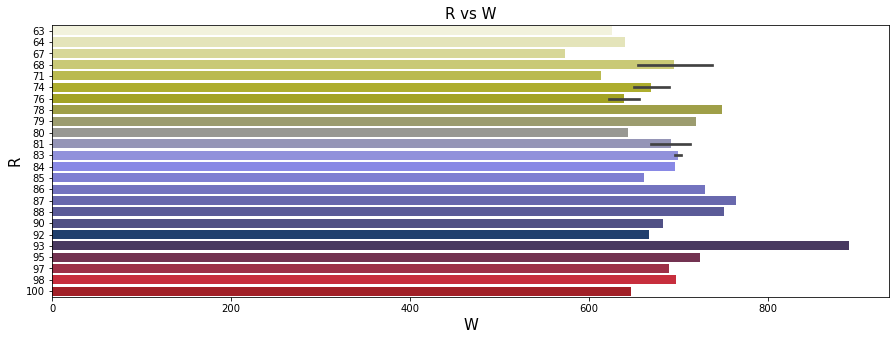

In [409]:
fig, ax = plt.subplots(figsize = (15 ,5))
sns.barplot(x = "R",y="W", data = df,ax = ax,orient = 'h' ,palette='gist_stern_r')
ax.set_xlabel( "W" , size = 15 )
ax.set_ylabel( "R" , size = 15 )
ax.set_title( "R vs W" , size = 15 )
plt.show()

###### 2. AB and W Variable

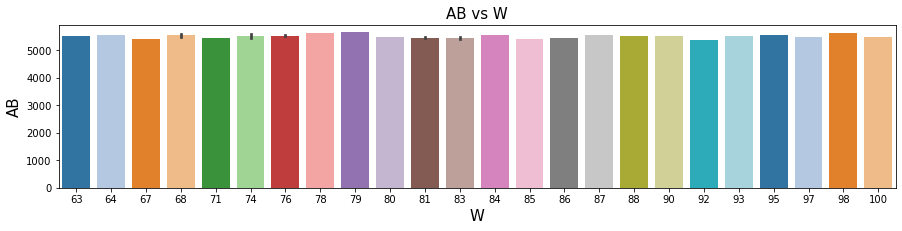

In [410]:
fig, ax = plt.subplots(figsize = (15 ,3))
s=sns.barplot(data=df,y='AB',x='W',ax = ax ,palette='tab20')
ax.set_xlabel( "W" , size = 15 )
ax.set_ylabel( "AB" , size = 15 )
ax.set_title( "AB vs W" , size = 15 )
plt.show()

###### 3. H and W Variable

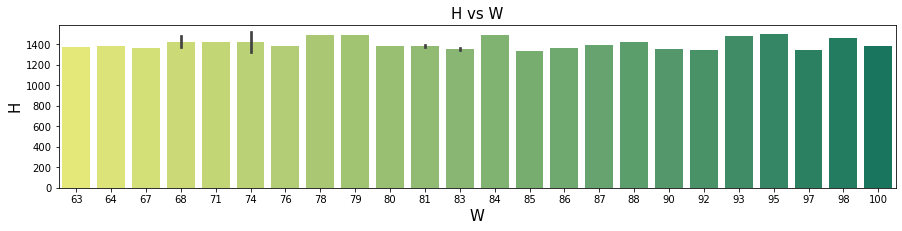

In [411]:
fig, ax = plt.subplots(figsize = (15 ,3))
s=sns.barplot(data=df,y='H',x='W',color='green',ax = ax ,palette='summer_r')
ax.set_xlabel( "W" , size = 15 )
ax.set_ylabel( "H" , size = 15 )
ax.set_title( "H vs W" , size = 15 )
plt.show()

###### 4. HR and W Variable

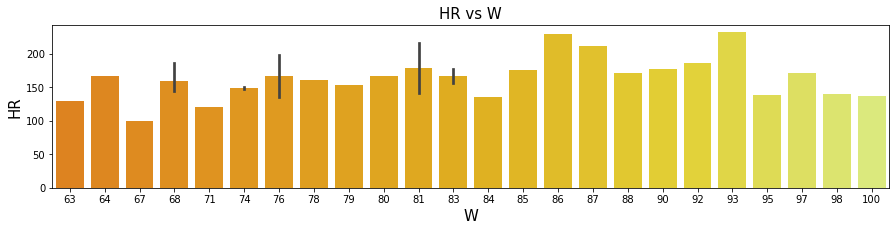

In [412]:
fig, ax = plt.subplots(figsize = (15 ,3))
s=sns.barplot(data=df,y='HR',x='W',ax = ax ,palette='Wistia_r')
ax.set_xlabel( "W" , size = 15 )
ax.set_ylabel( "HR" , size = 15 )
ax.set_title( "HR vs W" , size = 15 )
plt.show()

In [413]:
#5. BB Variable

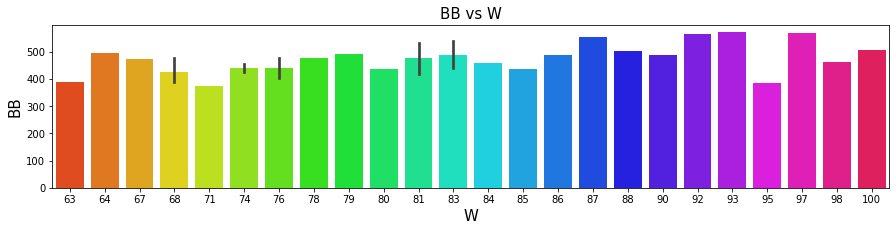

In [414]:
fig, ax = plt.subplots(figsize = (15 ,3))
s=sns.barplot(data=df,y='BB',x='W',ax = ax ,palette='hsv')
ax.set_xlabel( "W" , size = 15 )
ax.set_ylabel( "BB" , size = 15 )
ax.set_title( "BB vs W" , size = 15 )
plt.show()

In [415]:
#6. SO Variable

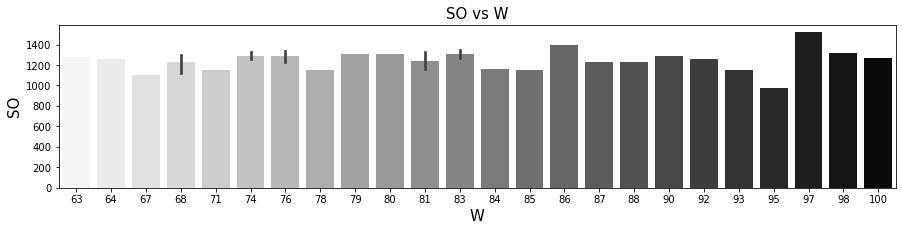

In [416]:
fig, ax = plt.subplots(figsize = (15 ,3))
s=sns.barplot(data=df,y='SO',x='W',ax = ax ,palette='gist_yarg')
ax.set_xlabel( "W" , size = 15 )
ax.set_ylabel( "SO" , size = 15 )
ax.set_title( "SO vs W" , size = 15 )
plt.show()

In [417]:
#7. SB Variable

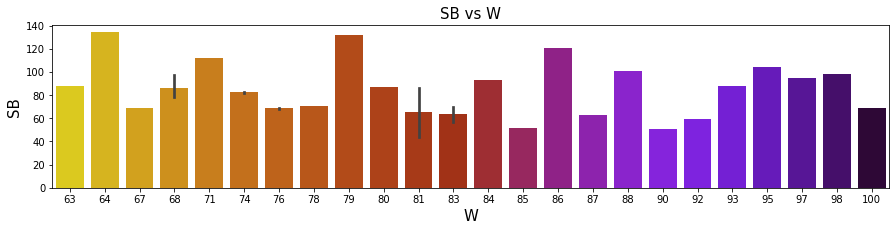

In [418]:
fig, ax = plt.subplots(figsize = (15 ,3))
s=sns.barplot(data=df,y='SB',x='W',ax = ax ,palette='gnuplot_r')
ax.set_xlabel( "W" , size = 15 )
ax.set_ylabel( "SB" , size = 15 )
ax.set_title( "SB vs W" , size = 15 )
plt.show()

In [419]:
#8. RA Variable

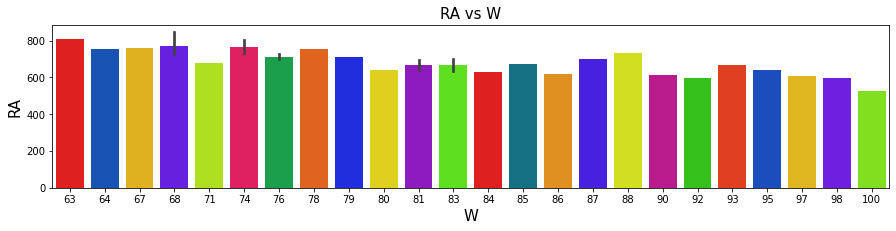

In [420]:
fig, ax = plt.subplots(figsize = (15 ,3))
s=sns.barplot(data=df,y='RA',x='W',ax = ax ,palette='prism_r')
ax.set_xlabel( "W" , size = 15 )
ax.set_ylabel( "RA" , size = 15 )
ax.set_title( "RA vs W" , size = 15 )
plt.show()

In [421]:
#9. ER Variable

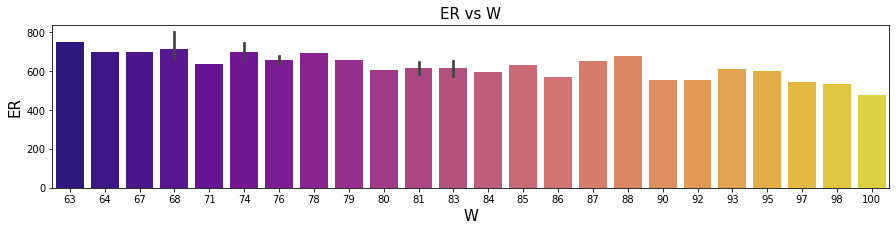

In [422]:
fig, ax = plt.subplots(figsize = (15 ,3))
s=sns.barplot(data=df,y='ER',x='W',ax = ax ,palette='plasma')
ax.set_xlabel( "W" , size = 15 )
ax.set_ylabel( "ER" , size = 15 )
ax.set_title( "ER vs W" , size = 15 )
plt.show()

In [423]:
#10. ERA Variable

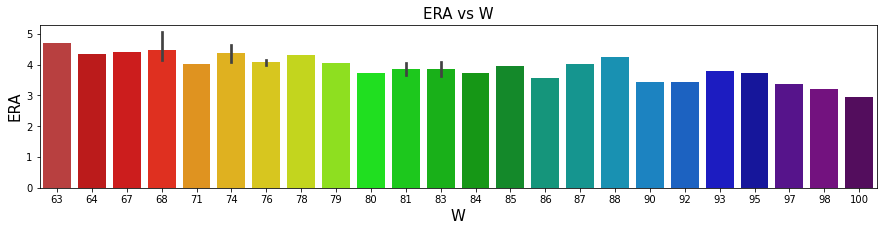

In [424]:
fig, ax = plt.subplots(figsize = (15 ,3))
s=sns.barplot(data=df,y='ERA',x='W',ax = ax ,palette='nipy_spectral_r')
ax.set_xlabel( "W" , size = 15 )
ax.set_ylabel( "ERA" , size = 15 )
ax.set_title( "ERA vs W" , size = 15 )
plt.show()

###### Multivariate Analysis

In [186]:
#Check for Correlation between multiple Variables

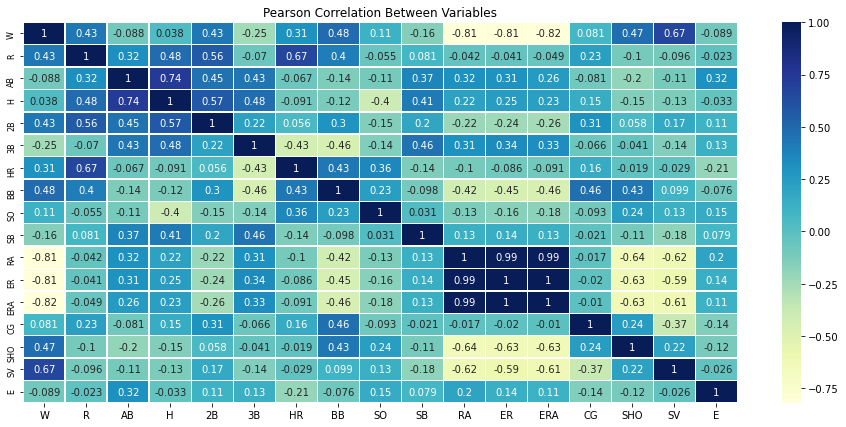

In [187]:
# Numerical Variable Correlation
pcorrel = df.corr(method='pearson').round(3)
plt.figure(figsize=(16,7)) 
sns.heatmap(pcorrel,xticklabels=pcorrel.columns,yticklabels=pcorrel.columns,cmap="YlGnBu",annot=True,linewidth=0.5)
plt.title("Pearson Correlation Between Variables")
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()

###### Check for Outliers

In [188]:
#for Discrete Variables

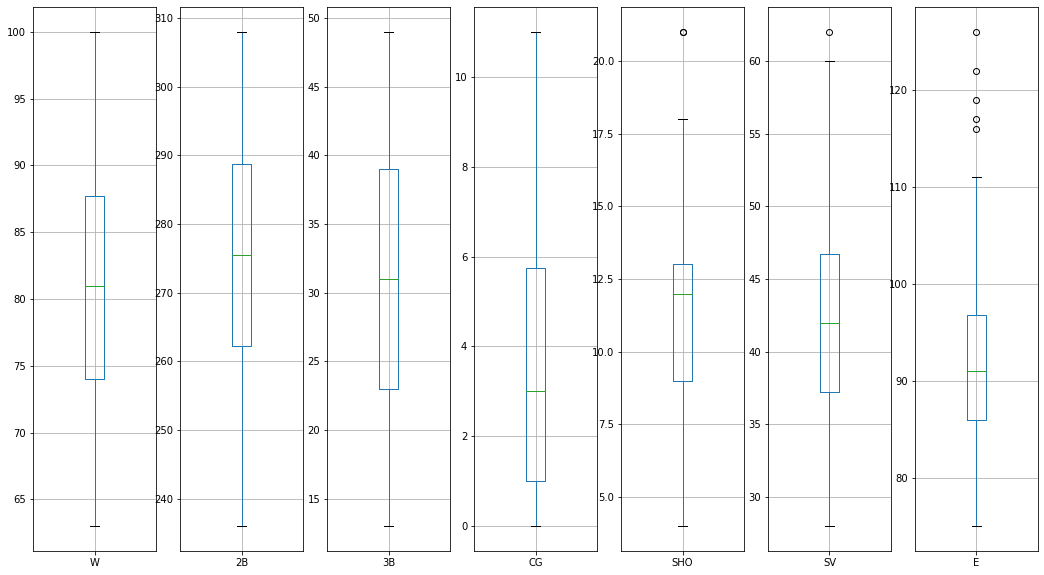

In [313]:
fig, pltcan=plt.subplots(nrows=1, ncols=len(discrete_feature), figsize=(18,10))
for predcol , i in zip(discrete_feature, range(len(discrete_feature))):
     df.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

*Observation :* <br> *there is outliers in SHO,SV and E variables*

In [314]:
#for Continuos Variable

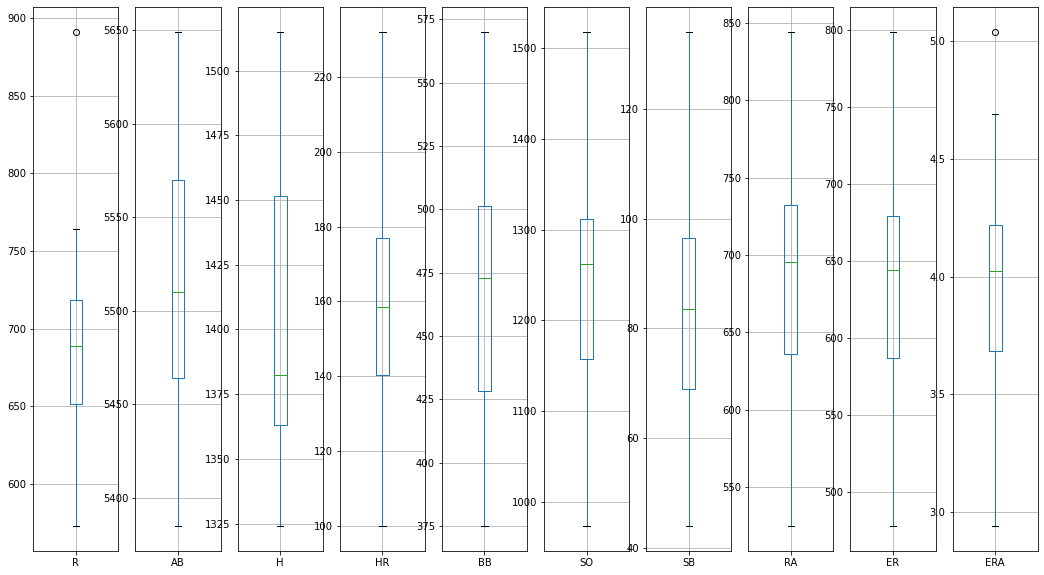

In [315]:
fig, pltcan=plt.subplots(nrows=1, ncols=len(continuous_feature), figsize=(18,10))
for predcol , i in zip(continuous_feature, range(len(continuous_feature))):
     df.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

*Observation :*<br> *there is outlier in R and ERA variables.*

In [316]:
#Check for Skewness 

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64


<AxesSubplot:>

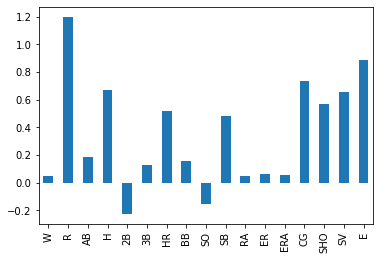

In [317]:
print(df.skew())
df.skew().plot(kind='bar')

*Observation :* <br> *There is skweness in R,H,HR,CG,SHO,SV,E variables.*

In [318]:
#Handling Zeros in CG variable

In [319]:
zeros=df['CG'].mode()
print("Mode of CG is ",zeros)
print("Zero in CG is replace by",zeros)
df['CG']=df['CG'].replace(0,1)

Mode of CG is  0    1
dtype: int64
Zero in CG is replace by 0    1
dtype: int64


In [320]:
#Recheck for Zeros in CG

In [321]:
df[df==0].count()/df.shape[0]*100   

W      0.0
R      0.0
AB     0.0
H      0.0
2B     0.0
3B     0.0
HR     0.0
BB     0.0
SO     0.0
SB     0.0
RA     0.0
ER     0.0
ERA    0.0
CG     0.0
SHO    0.0
SV     0.0
E      0.0
dtype: float64

In [322]:
#Renaming Columns

In [323]:
df.rename(columns = {'W':'Wins','R':'Runs','AB':'At Bats','H':'Hits','2B':'Doubles','3B':'Triples'}, inplace = True)
df.rename(columns = {'HR':'Home Runs','BB':'Walks','SO':'StrikeOut','SB':'Stolen Bases','RA':'Runs Allowed','ER':'Earned Runs'}, inplace = True)
df.rename(columns = {'ERA':'Earned Run Average','CG':'Complete Game','SHO':'Shutouts','SV':'Saves','E':'Errors'}, inplace = True)


In [324]:
df.head()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Home Runs,Walks,StrikeOut,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Game,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [325]:
#Handling Outliers

In [326]:
fout =['Shutouts','Saves','Errors','Runs','Earned Run Average']
for f in fout:
    q1 = df[f].quantile(0.25)
    q3 = df[f].quantile(0.75)
    IQR = q3-q1
    lolimit = q1 - (IQR*1.5)
    uplimit = q3 + (IQR*1.5)
    df.loc[df[f]<lolimit,f] = lolimit
    df.loc[df[f]>uplimit,f] = uplimit

In [327]:
#Recheck for Outliers

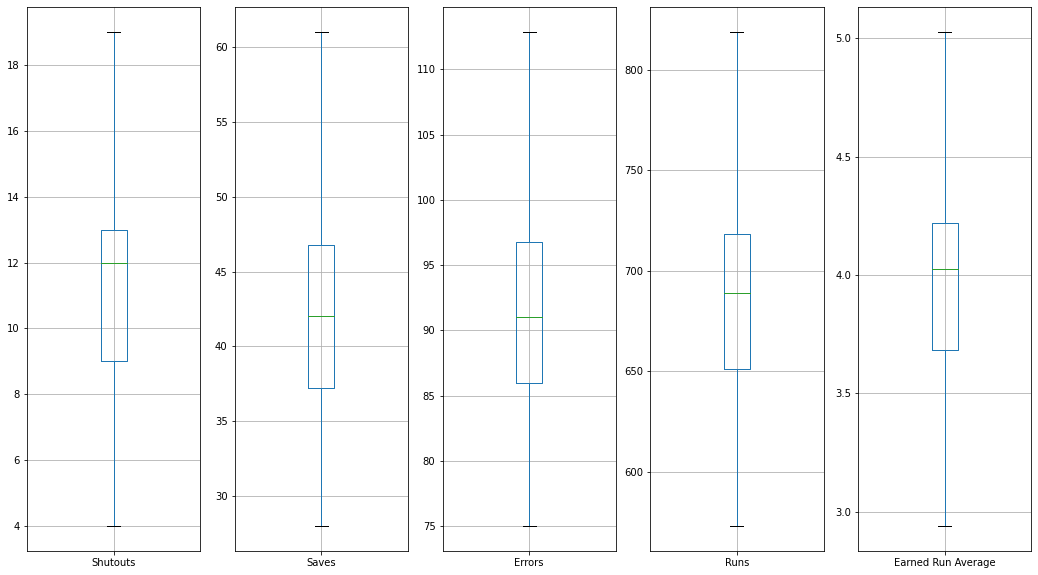

In [328]:
colslst1=['Shutouts','Saves','Errors','Runs','Earned Run Average']
fig, pltcan=plt.subplots(nrows=1, ncols=len(colslst1), figsize=(18,10))
for predcol , i in zip(colslst1, range(len(colslst1))):
     df.boxplot(column=predcol, figsize=(2,10), vert=True, ax=pltcan[i])

In [329]:
#removing Skewness 

In [330]:
df[['Runs']]= np.cbrt(df[['Runs']])
df[['Hits']]= np.cbrt(df[['Hits']])
df[['Home Runs']]= np.cbrt(df[['Home Runs']])
df[['Earned Runs']]= np.cbrt(df[['Earned Runs']])
df[['Earned Run Average']]= np.cbrt(df[['Earned Run Average']])
df[['Complete Game']]= np.cbrt(df[['Complete Game']])
df[['Shutouts']]= np.cbrt(df[['Shutouts']])
df[['Saves']]= np.cbrt(df[['Saves']])
df[['Errors']]= np.cbrt(df[['Errors']])


In [331]:
#Recheck for Skewness

In [332]:
print(df.skew())

Wins                  0.047089
Runs                  0.115627
At Bats               0.183437
Hits                  0.642599
Doubles              -0.230650
Triples               0.129502
Home Runs             0.175310
Walks                 0.158498
StrikeOut            -0.156065
Stolen Bases          0.479893
Runs Allowed          0.045734
Earned Runs          -0.165952
Earned Run Average   -0.207715
Complete Game         0.224312
Shutouts             -0.505920
Saves                 0.289502
Errors                0.358315
dtype: float64


In [333]:
#Feature Selection

In [334]:
cor = df.corr()
ctarget = abs(cor['Wins'])
rfeatature = ctarget[ctarget>.2]
result1=rfeatature.keys().to_list()
print('strong correlated :',result1)

rfeatature = ctarget[ctarget<0.2]
result2=rfeatature.keys().to_list()
print('\nweak correlated :',result2)

strong correlated : ['Wins', 'Runs', 'Doubles', 'Triples', 'Home Runs', 'Walks', 'Runs Allowed', 'Earned Runs', 'Earned Run Average', 'Shutouts', 'Saves']

weak correlated : ['At Bats', 'Hits', 'StrikeOut', 'Stolen Bases', 'Complete Game', 'Errors']


In [335]:
df.drop(['Complete Game','StrikeOut','Walks'],inplace=True,axis=1)

In [336]:
#Separate Target and Predicters

In [337]:
y=df[['Wins']]
x=df.drop(['Wins'],axis=1)

In [339]:
#Normalization
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.77890435,  0.        ,  0.        ,  1.48589293,  1.03641979,
        -0.76119428,  0.9395667 , -0.66148725, -0.50161356, -0.50677968,
        -0.82626667,  1.55748301, -0.34555243],
       [ 0.24142379,  0.        ,  0.        ,  0.07744806,  1.21373307,
        -0.1478218 , -0.54355056,  0.17319489,  0.2523742 ,  0.25561183,
         0.25128626,  0.36558475, -0.55222911],
       [-0.2997664 ,  0.        ,  0.        ,  1.68256459, -0.17920749,
        -0.68492214,  0.20636898, -0.67572815, -0.74899087, -0.64119705,
        -0.27723666, -0.60836489, -1.36905505],
       [-1.30162482,  0.        ,  0.        , -0.85004498, -0.37708653,
        -0.87783038, -0.64562658,  0.18725742,  0.10756686,  0.0535482 ,
        -0.54866632, -0.76633537,  0.76983472],
       [ 0.10334088,  0.        ,  0.        ,  0.79027196,  1.64705536,
        -0.32031683,  0.07374177,  1.60678229,  1.59165142,  1.53670681,
         0.25128626, -1.09913497, -0.55222911],
       [ 2.44010607,  0.      

In [340]:
# dividing the dataset in training and testing set

In [341]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 440)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(22, 13)
(22, 1)
(8, 13)
(8, 1)


In [342]:
# Sandardization of data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
print(x_train)
x_test = sc.fit_transform(x_test)
print(x_test)

[[-0.47139698  0.          0.         -0.59529962  0.34752019 -0.2892938
   0.02718294  0.47737766  0.16905968  0.17541235 -1.46606888  0.08545338
   0.16217534]
 [ 1.20626576  0.          0.          1.22015705  1.40345741 -0.07994326
   1.82879077  0.23979727  0.22404229  0.06748766  0.13577014  0.5382506
  -0.39956884]
 [ 0.6048379   0.          0.          0.4312236   1.23327642 -0.36115301
  -0.14836633  0.45102262  0.29274348  0.2833743   0.87531765 -2.51610521
   1.59593501]
 [ 0.00283114  0.          0.          2.20772144 -0.31124443 -0.54557381
   0.19682781 -0.73252183 -0.80961166 -0.72963444 -0.37510494 -0.41241106
  -1.1785858 ]
 [ 1.40889281  0.          0.          0.49490902 -0.60505238  1.98795643
   1.48195305 -1.02868544 -0.97586822 -0.94501274  0.38553435 -0.24101374
  -0.5020895 ]
 [-0.32001162  0.          0.         -0.47979104 -1.01206913  1.22270118
  -0.56806438  0.41146994  0.47120932  0.3265671   0.13577014  0.68035283
   0.3308475 ]
 [-0.19501662  0.       

In [344]:
#Model Building

In [345]:
#Linear Regression

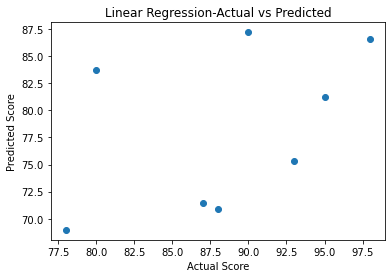


r2 Score On Train Data: 0.9503782283992926

r2 Score On Test Data: -2.7374775208000197


Mean Absolute Error: 11.38674070379678

Mean Squared Error: 158.78439654773834

Root Mean Squared Error: 12.600968079784122

Cross Validation
Linear Regression Score: [1. 1. 1. 1. 1.]
Average LinearRegression score: 1.0


In [346]:
LRregressor = LinearRegression()
LRregressor.fit(x_train, y_train)
y_pred = LRregressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Plot outputs
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Linear Regression-Actual vs Predicted')
plt.show()


# Calculating R2 Score
r2_score_train =LRregressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=LRregressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)
LRtrain=r2_score_train
LRtest=r2_score_test
print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


scores = cross_val_score(LRregressor,df, y, cv=5)
print('\nCross Validation')
print('Linear Regression Score:',scores)
LRcross=round(scores.mean(),4)
print('Average LinearRegression score:',round(scores.mean(),4))

In [347]:
#Lasso

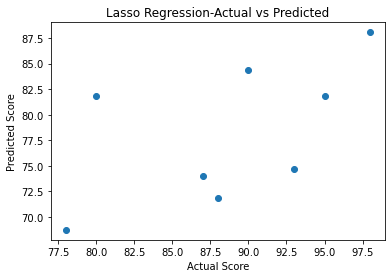


r2 Score On Train Data: 0.910123748653617

r2 Score On Test Data: -2.3952928152220996


Mean Absolute Error: 10.897433183118773

Mean Squared Error: 144.2468931967014

Root Mean Squared Error: 12.010282810854264

Cross Validation
Lasso Regression Score: [0.99943974 0.99711809 0.99976062 0.99918435 0.99992808]
Average Lasso Regression score: 0.9991


In [348]:
regressor = Lasso()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])


# Plot outputs
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Lasso Regression-Actual vs Predicted')
plt.show()


# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)
LStrain=r2_score_train
LStest=r2_score_test

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



scores = cross_val_score(regressor,df, y, cv=5)
print('\nCross Validation')
print('Lasso Regression Score:',scores)
LScross=round(scores.mean(),4)
print('Average Lasso Regression score:',round(scores.mean(),4))

In [349]:
#Decision Tree

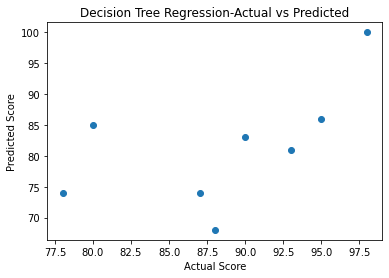


r2 Score On Train Data: 1.0

r2 Score On Test Data: -1.6127252666421477


Mean Absolute Error: 9.0

Mean Squared Error: 111.0

Root Mean Squared Error: 10.535653752852738

Explained Variance Score: -0.3755057006252298

Cross Validation
Decision Tree Regression Score: [ 0.81882771 -0.32824427  0.85605484  0.83987441  0.81893491]
Average Decision Tree Regression score: 0.6011


In [350]:
regressor =  DecisionTreeRegressor(max_depth=6,criterion='mse')
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Plot outputs
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Decision Tree Regression-Actual vs Predicted')
plt.show()

# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)
DTtrain=r2_score_train
DTtest=r2_score_test

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nExplained Variance Score:',explained_variance_score(y_test, y_pred))

scores = cross_val_score(regressor,df, y, cv=5)
print('\nCross Validation')
print('Decision Tree Regression Score:',scores)

DTcross=round(scores.mean(),4)
print('Average Decision Tree Regression score:',round(scores.mean(),4))


In [351]:
#Gradient Boosting

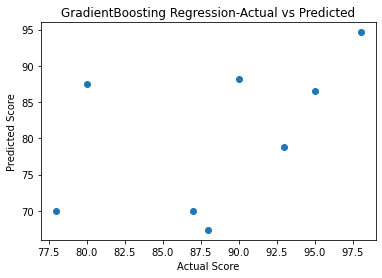


r2 Score On Train Data: 0.9999998713519727

r2 Score On Test Data: -2.305924351663813


Mean Absolute Error: 10.125249449144201

Mean Squared Error: 140.4501298777173

Root Mean Squared Error: 11.851165760283555

Explained Variance Score: -0.6978515820830073

Cross Validation
Gradient Boosting Regression Score: [0.90329367 0.93305007 0.88995886 0.85708885 0.97073108]
Average Gradient Boosting Regression score: 0.9108


In [352]:
regressor = GradientBoostingRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Plot outputs
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('GradientBoosting Regression-Actual vs Predicted')
plt.show()

# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)

GBtrain=r2_score_train
GBtest=r2_score_test
print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nExplained Variance Score:',explained_variance_score(y_test, y_pred))

scores = cross_val_score(regressor,df, y, cv=5)
print('\nCross Validation')
print('Gradient Boosting Regression Score:',scores)

GBcross=round(scores.mean(),4)
print('Average Gradient Boosting Regression score:',round(scores.mean(),4))


In [353]:
#KNN

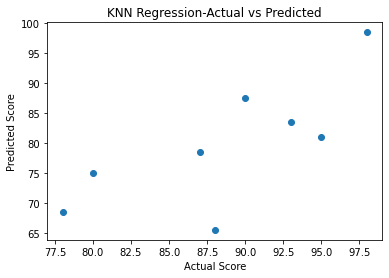


r2 Score On Train Data: 0.8856926335022008

r2 Score On Test Data: -1.9025376976829715


Mean Absolute Error: 9.0

Mean Squared Error: 123.3125

Root Mean Squared Error: 11.104616157256405

Explained Variance Score: -0.048547260022066885

Cross Validation
KNN Regression Score: [ 0.31927176 -6.58301527  0.24400228  0.10376766  0.04940828]
Average KNN Regression score: -1.1733


In [354]:
regressor =  KNeighborsRegressor(n_neighbors=2)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])

# Plot outputs
#plt.plot(y_test, y_pred, color='blue',linewidth=3)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('KNN Regression-Actual vs Predicted')
plt.show()

# Calculating R2 Score
r2_score_train =regressor.score(x_train, y_train)
print('\nr2 Score On Train Data:',r2_score_train)
r2_score_test=regressor.score(x_test,y_test)
print('\nr2 Score On Test Data:',r2_score_test)

KNNtrain=r2_score_train
KNNtest=r2_score_test

print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('\nExplained Variance Score:',explained_variance_score(y_test, y_pred))

scores = cross_val_score(regressor,df, y, cv=5)
print('\nCross Validation')
print('KNN Regression Score:',scores)

KNNcross=round(scores.mean(),4)
print('Average KNN Regression score:',round(scores.mean(),4))


In [355]:
#compairing Models

In [356]:
trainscore=[LRtrain,LStrain,DTtrain,GBtrain,KNNtrain]
testscore=[LRtest,LStest,DTtest,GBtest,KNNtest]
VAlscore=[LRcross,LScross,DTcross,GBcross,KNNcross]
col={'Train Score':trainscore,'Test Score':testscore,'Validation':VAlscore}
models=['Linear Regression','Lasso','Decision Tree','Gradient Boosting','KNN']
dfp=pd.DataFrame(data=col,index=models)
dfp

,Train Score,Test Score,Validation
Linear Regression,0.950378,-2.737478,1.0000
Lasso,0.910124,-2.395293,0.9991
Decision Tree,1.000000,-1.612725,0.6011
Gradient Boosting,1.000000,-2.305924,0.9108
KNN,0.885693,-1.902538,-1.1733


<AxesSubplot:>

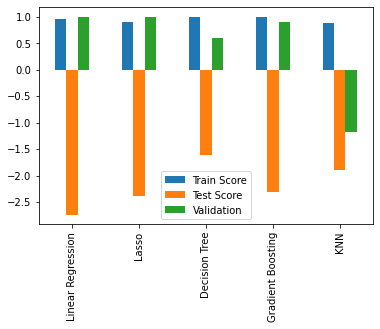

In [357]:
dfp.plot(kind='bar')

In [358]:
#Hyperparameter Tunining for Linear Regression

In [360]:
fit_intercept=[True,False]
normalize=[True,False]
copy_X=[True,False]
positive=[True,False]
n_jobs= [1,5,10, 100,200,500]
param_distributions = dict(fit_intercept=fit_intercept,
                           normalize=normalize,
                           copy_X=copy_X,
                           positive=positive,
                           n_jobs= n_jobs)

random = RandomizedSearchCV(estimator=LRregressor,
                            param_distributions=param_distributions,
                            verbose=1, n_jobs=-1,
                            n_iter=1000)
random_result = random.fit(x_train, y_train)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Score:  0.039299042415686894
Best Params:  {'positive': False, 'normalize': False, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}


In [ ]:
#selecting Model

In [ ]:
#choosing Linear Regression as Final MOdel

In [ ]:
#Retraining Model

In [364]:
PScaler=StandardScaler()
PScalerFit=PScaler.fit(df)

X=PScalerFit.transform(df)

print(X.shape)
print(y.shape)

(30, 14)
(30, 1)


In [366]:
regressor =LinearRegression(positive=False,normalize=False, n_jobs=1, fit_intercept=True, copy_X=True)
Final_Model=regressor.fit(X,y)

# Calculating R2 Score
r2_score =regressor.score(X, y)
print('Final Score:',r2_score)


Final Score: 1.0


In [ ]:
#Saving Model

In [367]:
import pickle
filename='Baseball.pk1'
pickle.dump(regressor,open(filename,'wb'))
print("Model Saved")

Model Saved
